In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=df80611a0e260aa81e41257ef8b10c6525eae9cfa973e6329690823d528a50c1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Вариант 4

Построить нечеткую базу знаний (использовать не менее 3 лингвистических переменных для задачи управления транспортным средством (управление рулем, газом, тормозом при въезде в гараж),
проверить ее на полноту и произвести нечеткий вывод для конкретных значений (выбрать случайным образом).


Выделим из этих предложений лингвистические переменные (определим их через формальную запись <β, T, X>):
1.	β=управление рулем, T=(«сильный», «средний», «маленький»), X=[0,240] (угол поворота руля)
2.	β=газ, T=(«низкая», «средняя», «высокая»), X=[0,7] (количество передач)
3.	β=тормоз, T=(«слабо», «достаточно», «сильно»), X=[0,60] (сила нажатия на педаль),

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# переменные для задачи управления транспортным средством - автомобиль (управление рулем, газом, тормоз при въезде в гараж)
steering_wheel_control = ctrl.Antecedent(np.arange(0, 240, 1), 'steering wheel')
gas = ctrl.Antecedent(np.arange(0, 7, 1), 'gas')
brake  = ctrl.Antecedent(np.arange(0, 50, 1), 'brake')

#выходная переменная - скорость
speed = ctrl.Consequent(np.arange(0, 180, 1), 'speed')

#используем стандартную функцию принадлежности (треугольник)
speed.automf(names=['small', 'medium', 'high'])

#ранжируем данные
steering_wheel_control['small'] = fuzz.trapmf(steering_wheel_control.universe, [0, 25, 55, 85])
steering_wheel_control['medium'] = fuzz.trapmf(steering_wheel_control.universe, [70, 100, 125, 160])
steering_wheel_control['high'] = fuzz.trapmf(steering_wheel_control.universe, [145, 170, 195, 210])

gas['low'] = fuzz.trapmf(gas.universe, [0, 1, 2, 2])
gas['medium'] = fuzz.trapmf(gas.universe, [3, 3, 4, 5])
gas['high'] = fuzz.trapmf(gas.universe, [4, 5, 6, 7])

brake['weakly'] = fuzz.trapmf(brake.universe, [0, 5, 15, 20])
brake['enough'] = fuzz.trapmf(brake.universe, [10, 24, 30, 34])
brake['strongly'] = fuzz.trapmf(brake.universe,[25, 40, 47, 55])

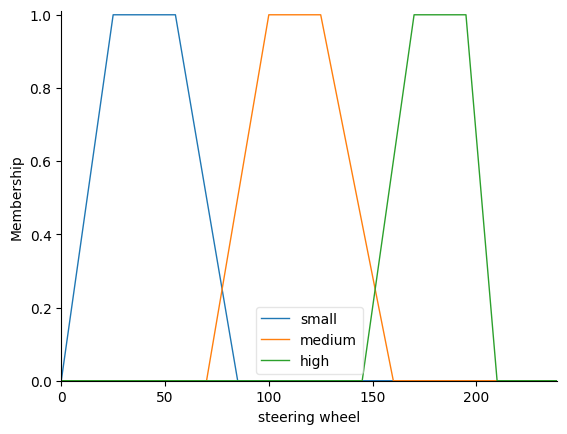

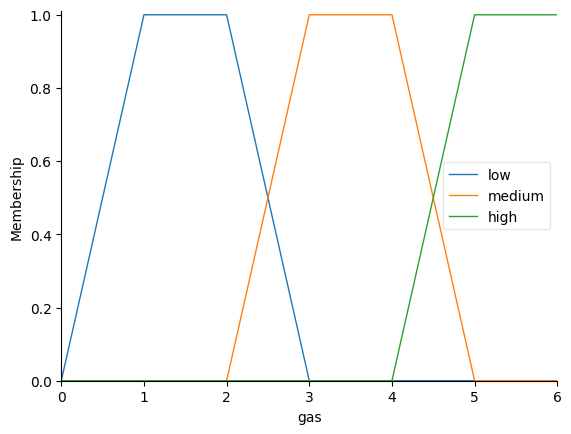

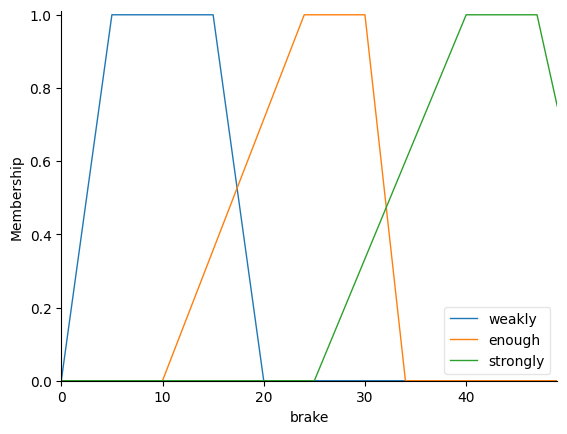

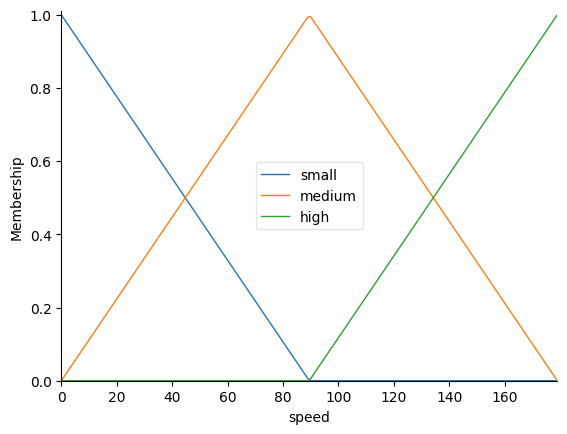

In [26]:
#построение графиков
steering_wheel_control.view()
gas.view()
brake.view()
speed.view()

База правил:

●	Если управление рулем – маленькое и газ – малый и тормоз – слабо, то скорость – малая

●	Если управление рулем – маленькое и газ – средний и тормоз – слабо, то скорость – средняя.

●	Если управление рулем – маленькое и газ – высокий и тормоз – слабо, то скорость – высокая.

●	Если управление рулем – маленькое и газ – средний и тормоз – достаточно, то скорость – средняя.

●	Если управление рулем – среднее и газ – низкий и тормоз – слабо, то скорость – малая.

●	Если управление рулем – среднее и газ – средний и тормоз – достаточно, то скорость – средняя;

●	Если управление рулем – среднее и газ – высокий и тормоз – слабо, то скорость – высокая.

●	Если управление рулем – среднее и газ – низкий и тормоз – сильно, то скорость – слабая.

●	Если управление рулем – сильное и газ – низкий и тормоз – слабо, то скорость – слабая.

●	Если управление рулем – сильное и газ – средний и тормоз – слабо, то скорость – малая.

●	Если управление рулем - сильное и газ – высокий и тормоз – сильно, то скорость – малая.

●	Если управление рулем – сильное и газ – низкий и тормоз – достаточно, то скорость – слабая.

●	Если управление рулем – маленькое и газ – высокий и тормоз – сильно, то скорость – малая.

●	Если управление рулем – маленькое и газ – высокий и тормоз – достаточно, то скорость – средняя.


In [28]:
rule1 = ctrl.Rule(steering_wheel_control['small'] & gas['low'] & brake['weakly'], speed['small'])
rule2 = ctrl.Rule(steering_wheel_control['small'] & gas['medium'] & brake['weakly'], speed['medium'])
rule3 = ctrl.Rule(steering_wheel_control['small'] & gas['high'] & brake['weakly'], speed['high'])
rule4 = ctrl.Rule(steering_wheel_control['small'] & gas['medium'] & brake['enough'], speed['medium'])

rule5 = ctrl.Rule(steering_wheel_control['medium'] & gas['low'] & brake['weakly'], speed['small'])
rule6 = ctrl.Rule(steering_wheel_control['medium'] & gas['medium'] & brake['enough'], speed['medium'])
rule7 = ctrl.Rule(steering_wheel_control['medium'] & gas['high'] & brake['weakly'], speed['high'])

rule8 = ctrl.Rule(steering_wheel_control['medium'] & gas['low'] & brake['strongly'], speed['small'])
rule9 = ctrl.Rule(steering_wheel_control['high'] & gas['low'] & brake['weakly'], speed['small'])

rule10 = ctrl.Rule(steering_wheel_control['high'] & gas['medium'] & brake['weakly'], speed['small'])
rule11 = ctrl.Rule(steering_wheel_control['high'] & gas['high'] & brake['strongly'], speed['small'])

rule12 = ctrl.Rule(steering_wheel_control['high'] & gas['low'] & brake['enough'], speed['small'])
rule13 = ctrl.Rule(steering_wheel_control['small'] & gas['high'] & brake['strongly'], speed['small'])
rule14 = ctrl.Rule(steering_wheel_control['small'] & gas['high'] & brake['enough'], speed['medium'])

In [55]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
consumption_simulator= ctrl.ControlSystemSimulation(consumption_ctrl)

# входные данные
consumption_simulator.input['steering wheel'] = 193
consumption_simulator.input['gas'] = 2
consumption_simulator.input['brake'] = 3

# выходные данные (результат)
consumption_simulator.compute()
print(consumption_simulator.output['speed'])

33.24494728676181


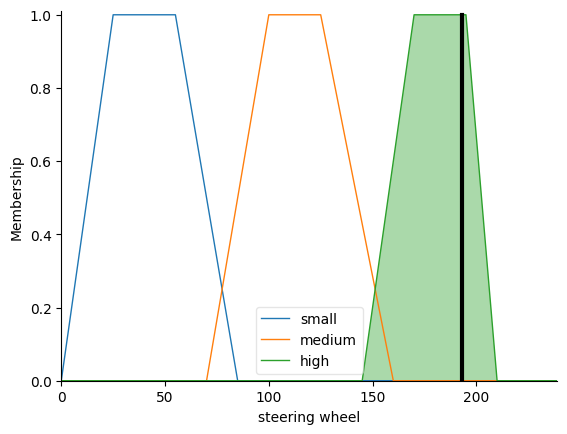

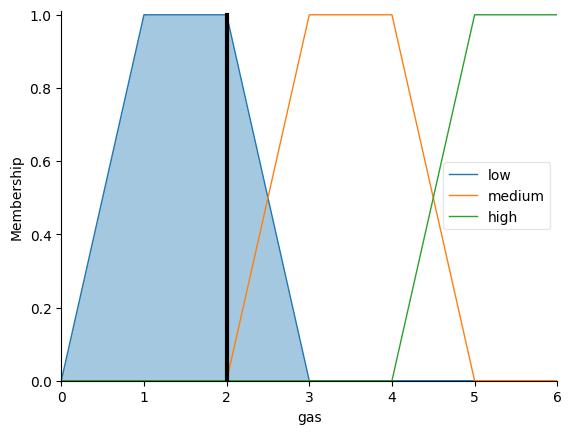

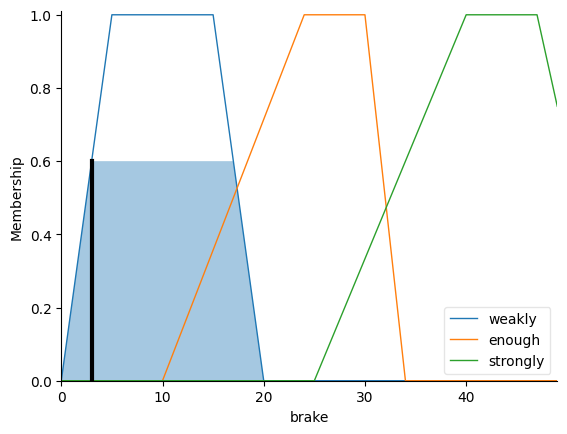

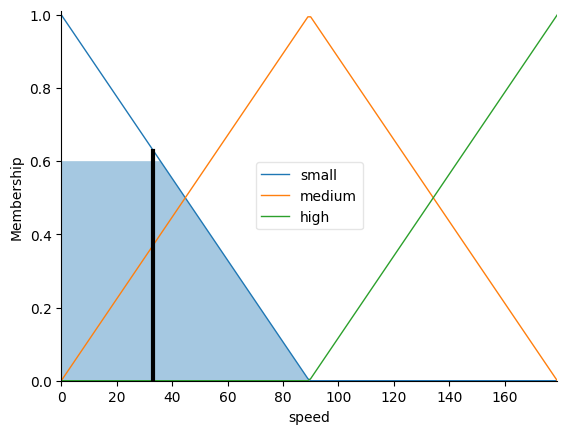

In [56]:
# построение графиков
steering_wheel_control.view(sim=consumption_simulator)
gas.view(sim=consumption_simulator)
brake.view(sim=consumption_simulator)
speed.view(sim=consumption_simulator)